# **LED Lifetime Prediction**

----

## **0. Import data & library**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import pandas as pd

In [ ]:
dataset = pd.read_excel('/content/li_vi_organised_reshaped.xlsx')
dataset.head()

,LED,temperature,stressing current,performing hour,input voltage,reverse saturated current,light intensity
0,A,25,40,0.0,-5.00,-5.270000e-10,2517
1,A,25,40,0.0,-4.95,-5.180000e-10,2517
2,A,25,40,0.0,-4.90,-5.210000e-10,2517
3,A,25,40,0.0,-4.85,-5.220000e-10,2517
4,A,25,40,0.0,-4.80,-5.160000e-10,2517




---
## **Model 1: With LED label information**


In [ ]:
df2=pd.get_dummies(dataset.iloc[:,0])
df=dataset.iloc[:,1:].join(df2)
df=df.drop_duplicates()
X = df.iloc[:,:4].join(df.iloc[:,6:]).values
y = df.iloc[:,5].values

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the DNN
model = Sequential()
optimizer = keras.optimizers.RMSprop(0.001)
# Adding the input layer and the first hidden layer
model.add(Dense(units = 32, activation = 'relu', input_dim = 9))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1, activation = 'relu'))

# Compiling the DNN
model.compile(optimizer = optimizer, loss = 'mse', metrics = ['mse','mae'])

# Fitting the DNN to the Training set
history = model.fit(X_train, y_train, batch_size = 100, epochs = 50, 
                    validation_split = 0.2,verbose=1)

Epoch 1/50
541/541 [==============================] - 2s 2ms/step - loss: 2680933.9031 - mse: 2680933.9031 - mae: 1341.7975 - val_loss: 2196879.7500 - val_mse: 2196879.7500 - val_mae: 1315.1790
Epoch 2/50
541/541 [==============================] - 1s 2ms/step - loss: 2176894.4933 - mse: 2176894.4933 - mae: 1314.2421 - val_loss: 2168666.5000 - val_mse: 2168666.5000 - val_mae: 1312.1534
Epoch 3/50
541/541 [==============================] - 1s 2ms/step - loss: 2158636.1995 - mse: 2158636.2009 - mae: 1310.4511 - val_loss: 2115393.7500 - val_mse: 2115393.7500 - val_mae: 1294.3927
Epoch 4/50
541/541 [==============================] - 1s 2ms/step - loss: 2074295.5558 - mse: 2074295.5558 - mae: 1284.8560 - val_loss: 1934435.7500 - val_mse: 1934435.7500 - val_mae: 1241.6707
Epoch 5/50
541/541 [==============================] - 1s 2ms/step - loss: 1809928.7869 - mse: 1809928.7869 - mae: 1202.9613 - val_loss: 1084978.8750 - val_mse: 1084978.8750 - val_mae: 927.6682
Epoch 6/50
541/541 [===========

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
45,224217.71875,224217.718750,270.573120,338069.500000,338069.500000,356.985077,45
46,222115.84375,222115.843750,268.945435,232807.609375,232807.609375,281.057159,46
47,220249.12500,220249.125000,267.130188,205391.406250,205391.406250,260.383575,47
48,218755.40625,218755.390625,265.283936,280063.531250,280063.531250,317.135315,48
49,217142.46875,217142.468750,264.319763,240899.796875,240899.796875,290.964203,49


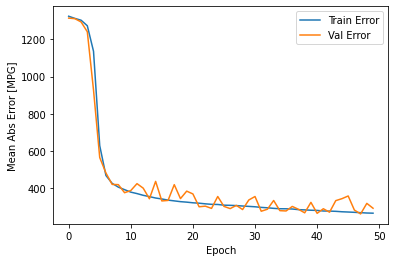

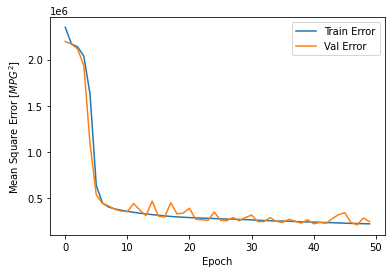

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.legend()
  plt.show()


plot_history(history)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[   0.     ],
       [   0.     ],
       [   0.     ],
       ...,
       [1500.2756 ],
       [ 834.67706],
       [   0.     ]], dtype=float32)

Confusion matrix, without normalization
[[ 4382  1650]
 [   82 10770]]


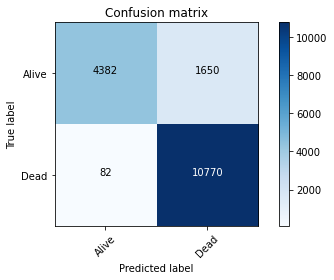

In [ ]:
y_pred2=y_pred>0
y_test2=y_test>0

from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
 
plot_confusion_matrix(confusion_matrix(y_test2, y_pred2),['Dead','Alive'])

In [ ]:
import sklearn.metrics
print(f'f1 score: {sklearn.metrics.f1_score(y_test2, y_pred2)*100:.2f}%')
print(f'Accuracy: {sklearn.metrics.accuracy_score(y_test2, y_pred2)*100:.2f}%')

f1 score: 92.56%
Accuracy: 89.74%


0.000000 0.000000 2.000000
0.273541 0.992444 1.000000
1.000000 1.000000 0.000000


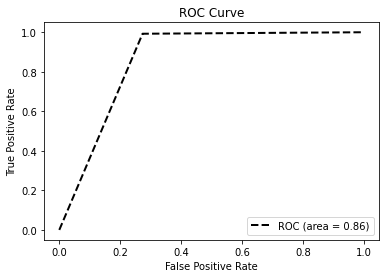

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thersholds = roc_curve(y_test2, y_pred2)

for i, value in enumerate(thersholds):
    print("%f %f %f" % (fpr[i], tpr[i], value))

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## **Summary: Model1 Performance**
## **Light intensity predicition**
mean square error (MSE): 131498.8

mean absolute error (MAE): 195.1

## **Dead/Alive classification:**
f1 score: 93.23%

Accuracy: 90.81%




---

## **Model 2: No A-E label, use LED E as testing set**

In [ ]:
data_E=dataset[dataset['LED']=='E']
data_E.head()

,LED,temperature,stressing current,performing hour,input voltage,reverse saturated current,light intensity
88352,E,25,40,0.0,-5.00,-6.250000e-10,2529
88353,E,25,40,0.0,-4.95,-6.130000e-10,2529
88354,E,25,40,0.0,-4.90,-6.160000e-10,2529
88355,E,25,40,0.0,-4.85,-6.090000e-10,2529
88356,E,25,40,0.0,-4.80,-6.040000e-10,2529


In [ ]:
data_AtoD=dataset[dataset['LED']!='E']
from sklearn.utils import shuffle
data_AtoD=shuffle(data_AtoD)
data_E=shuffle(data_E)
data_AtoD.head()

,LED,temperature,stressing current,performing hour,input voltage,reverse saturated current,light intensity
23803,B,25,40,2.0,4.40,9.999800e-02,3178
48574,C,25,40,7.0,-3.80,-5.180000e-10,2734
43177,B,60,80,6.5,-4.70,0.000000e+00,0
42378,B,60,80,4.5,-4.45,-7.820000e-10,0
2233,A,25,40,3.0,0.90,-4.960000e-10,3169


In [ ]:
X = data_AtoD.iloc[:,1:5].values
y = data_AtoD.iloc[:,6].values

In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

optimizer = keras.optimizers.RMSprop(0.001)

# Initialising the ANN
model2 = Sequential()

# Adding the input layer and the first hidden layer
model2.add(Dense(units = 64, activation = 'relu', input_dim = 4))
model2.add(Dense(units = 64, activation = 'relu'))
model2.add(Dense(units = 64, activation = 'relu'))

# Adding the output layer
model2.add(Dense(units = 1, activation = 'relu'))

# Compiling the ANN
model2.compile(optimizer = optimizer, loss = 'mse', metrics = ['mse','mae'])

# Fitting the ANN to the Training set
history = model2.fit(X, y, batch_size = 100, epochs = 50, validation_split = 0.2,verbose=1)

Epoch 1/50
707/707 [==============================] - 2s 2ms/step - loss: 3288792.5226 - mse: 3288792.5254 - mae: 1594.2294 - val_loss: 2703890.7500 - val_mse: 2703890.7500 - val_mae: 1510.8569
Epoch 2/50
707/707 [==============================] - 1s 2ms/step - loss: 2562774.4774 - mse: 2562774.4721 - mae: 1463.0637 - val_loss: 1463771.2500 - val_mse: 1463771.2500 - val_mae: 1035.2513
Epoch 3/50
707/707 [==============================] - 1s 2ms/step - loss: 1116395.5619 - mse: 1116395.5608 - mae: 858.6568 - val_loss: 539742.8750 - val_mse: 539742.8750 - val_mae: 553.5099
Epoch 4/50
707/707 [==============================] - 1s 2ms/step - loss: 440296.9902 - mse: 440296.9936 - mae: 463.0526 - val_loss: 337192.6562 - val_mse: 337192.6562 - val_mae: 383.6751
Epoch 5/50
707/707 [==============================] - 1s 2ms/step - loss: 326413.3484 - mse: 326413.3548 - mae: 372.5957 - val_loss: 308301.3438 - val_mse: 308301.3438 - val_mae: 348.6296
Epoch 6/50
707/707 [==========================

In [ ]:
X_test = data_E.iloc[:,1:5].values
y_test = data_E.iloc[:,6].values

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[  61.887165],
       [   0.      ],
       [   0.      ],
       ...,
       [3393.8987  ],
       [   0.      ],
       [1285.1223  ]], dtype=float32)

In [ ]:
y_pred2=y_pred>0
y_test2=y_test>0

Confusion matrix, without normalization
[[ 4123  1907]
 [    0 16058]]


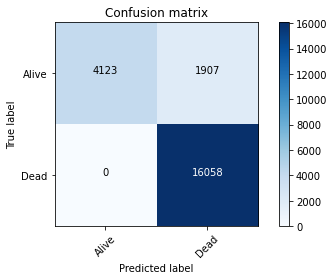

In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
 
plot_confusion_matrix(confusion_matrix(y_test2, y_pred2),['Alive','Dead'])

In [ ]:
import sklearn.metrics
print(f'f1 score: {sklearn.metrics.f1_score(y_test2, y_pred2)*100:.2f}%')
print(f'Accuracy: {sklearn.metrics.accuracy_score(y_test2, y_pred2)*100:.2f}%')

f1 score: 94.39%
Accuracy: 91.37%


0.000000 0.000000 2.000000
0.316252 1.000000 1.000000
1.000000 1.000000 0.000000


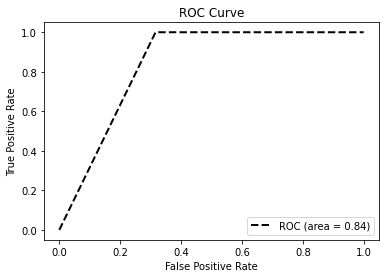

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thersholds = roc_curve(y_test2, y_pred2)

for i, value in enumerate(thersholds):
    print("%f %f %f" % (fpr[i], tpr[i], value))

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()



---

## **Model 3**

### **Re-Data Extraction: Dropping weird data & add 0 LI data**
Tem 25, Current 60, Hr>=15

Tem 60, Current 60, Hr>=11


In [ ]:
dataset

,LED,temperature,stressing current,performing hour,input voltage,reverse saturated current,light intensity
0,A,25,40,0.0,-5.00,-5.270000e-10,2517
1,A,25,40,0.0,-4.95,-5.180000e-10,2517
2,A,25,40,0.0,-4.90,-5.210000e-10,2517
3,A,25,40,0.0,-4.85,-5.220000e-10,2517
4,A,25,40,0.0,-4.80,-5.160000e-10,2517
...,...,...,...,...,...,...,...
83410,E,60,100,2.0,4.80,1.674190e-02,0
83411,E,60,100,2.0,4.85,7.570060e-03,0
83412,E,60,100,2.0,4.90,1.024776e-02,0
83413,E,60,100,2.0,4.95,2.986120e-02,0


In [ ]:
indexNames = dataset[ (dataset['temperature'] == 25)
                & (dataset['stressing current'] == 60)& (dataset['performing hour']>=15) ].index
df_dropped=dataset.drop(indexNames).reset_index().iloc[:,1:]
indexNames = df_dropped[ (df_dropped['temperature'] == 60)
                & (df_dropped['stressing current'] == 60)& (df_dropped['performing hour']>=11) ].index
df_dropped=df_dropped.drop(indexNames).reset_index().iloc[:,1:]
from sklearn.utils import shuffle
df_dropped=shuffle(df_dropped)
df_dropped['temperature']=df_dropped['temperature']+273
df_dropped

,LED,temperature,stressing current,performing hour,input voltage,reverse saturated current,light intensity
46721,D,298,40,4.0,-0.55,-5.150000e-10,3514
20085,B,298,60,13.0,4.30,1.000003e-01,2096
76097,E,333,100,1.5,0.95,1.570000e-05,0
39112,C,298,100,1.0,0.90,-3.530000e-10,2834
52755,D,298,80,9.0,-0.35,-2.620000e-11,0
...,...,...,...,...,...,...,...
73948,E,333,80,2.0,4.05,9.999660e-02,501
32494,C,298,40,9.0,1.65,-4.100000e-10,2842
28984,B,333,80,5.0,-3.00,-1.323970e-04,0
50613,D,298,60,13.0,3.10,2.097300e-02,1579


In [ ]:
#add row with LI=0
t=0
new=pd.DataFrame(columns=['LED','temperature','stressing current','performing hour','input voltage','reverse saturated current','light intensity'])
for row,content in df_dropped[df_dropped['light intensity']==0].iterrows():
  if t>30000:
    break
  else:
    t+=1
  LED=content[0]
  temperature=content[1]
  current=content[2]
  hour=content[3]
  voltage=content[4]
  rsc=content[5]
  for h in range(1,5):
    new=new.append({'LED':LED,
            'temperature':temperature,
            'stressing current':current,
            'performing hour':hour+h,
            'input voltage':voltage,
            'reverse saturated current':rsc,'light intensity':0},ignore_index=True)
new=new.drop_duplicates()

In [ ]:
df_dropped=pd.concat([df_dropped,new]).drop_duplicates()
df_dropped

,LED,temperature,stressing current,performing hour,input voltage,reverse saturated current,light intensity
25931,B,333,60,5.0,-4.90,-4.440000e-10,1538
1296,A,298,40,6.0,-0.50,-5.260000e-10,3360
51041,D,298,80,0.0,4.40,9.999730e-02,3932
27729,B,333,80,1.0,4.60,9.999170e-02,718
72612,E,333,60,9.0,-2.45,-3.230000e-12,0
...,...,...,...,...,...,...,...
10935,C,298,80,16.0,1.25,1.530000e-09,0
10936,C,298,80,9.0,1.45,1.380000e-10,0
10937,C,298,80,10.0,1.45,1.380000e-10,0
10938,C,298,80,11.0,1.45,1.380000e-10,0


In [ ]:
X = df_dropped.iloc[:,1:5].values
X=np.asarray(X).astype('float32')
y = df_dropped.iloc[:,6].values
y=np.asarray(y).astype('float32')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

optimizer = keras.optimizers.RMSprop(0.001)
#optimizer = keras.optimizers.Nadam()
# Initialising the ANN
model3 = Sequential()

# Adding the input layer and the first hidden layer
model3.add(Dense(units = 32, activation = 'relu', input_dim = 4))
model3.add(Dense(units = 32, activation = 'relu'))
model3.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer
model3.add(Dense(units = 1, activation = 'relu'))

# Compiling the DNN
model3.compile(optimizer = optimizer, loss = 'mse', metrics = ['mse','mae'])

# Fitting the DNN to the Training set
history = model3.fit(X_train, y_train, batch_size = 100, epochs = 50, validation_split = 0.2,verbose=1)

Epoch 1/50
644/644 [==============================] - 2s 2ms/step - loss: 1939040.1841 - mse: 1939040.1841 - mae: 1198.2818 - val_loss: 1094483.5000 - val_mse: 1094483.5000 - val_mae: 851.9033
Epoch 2/50
644/644 [==============================] - 1s 2ms/step - loss: 1046309.4728 - mse: 1046309.4596 - mae: 825.3670 - val_loss: 979434.0625 - val_mse: 979434.0625 - val_mae: 787.4288
Epoch 3/50
644/644 [==============================] - 1s 2ms/step - loss: 934948.6584 - mse: 934948.6584 - mae: 785.1451 - val_loss: 851407.9375 - val_mse: 851407.9375 - val_mae: 732.8204
Epoch 4/50
644/644 [==============================] - 1s 2ms/step - loss: 812786.5364 - mse: 812786.5364 - mae: 711.6455 - val_loss: 817238.8125 - val_mse: 817238.8125 - val_mae: 668.8237
Epoch 5/50
644/644 [==============================] - 1s 2ms/step - loss: 727138.8155 - mse: 727138.8155 - mae: 644.6575 - val_loss: 688864.6250 - val_mse: 688864.6250 - val_mae: 626.3660
Epoch 6/50
644/644 [==============================] -

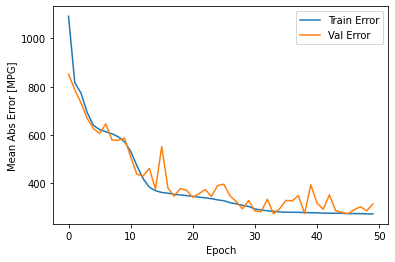

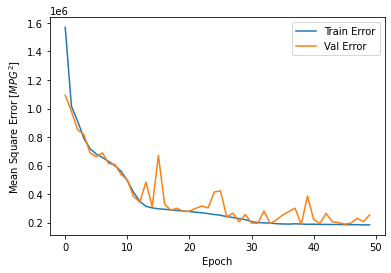

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.legend()
  plt.show()


plot_history(history)

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
45,185287.984375,185287.984375,273.504333,189491.37500,189491.37500,273.311066,45
46,185665.968750,185665.968750,273.701294,195768.71875,195768.71875,290.036346,46
47,185389.937500,185389.937500,273.600769,230514.93750,230514.93750,302.171509,47
48,183914.937500,183914.937500,272.492950,206340.53125,206340.53125,285.707123,48
49,183646.406250,183646.406250,272.391083,253555.62500,253555.62500,313.534607,49


In [ ]:
y_pred = model3.predict(X_test)
y_pred2=y_pred>0
y_test2=y_test>0
sum(y_pred2)

array([11007])

In [ ]:
sum(y_test2)

10317

Confusion matrix, without normalization
[[4687 1076]
 [ 386 9931]]


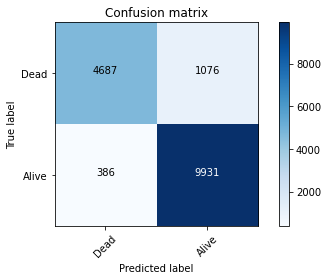

In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
 
plot_confusion_matrix(confusion_matrix(y_test2, y_pred2),['Dead','Alive'])

In [ ]:
import sklearn.metrics
print(f'f1 score: {sklearn.metrics.f1_score(y_test2, y_pred2)*100:.2f}%')
print(f'Accuracy: {sklearn.metrics.accuracy_score(y_test2, y_pred2)*100:.2f}%')

f1 score: 93.14%
Accuracy: 90.91%


In [ ]:
model3.save('/content/model3.h5')

----
## **Model4: Overfitting Prevent**
### **Model3 improvement (dropout & L2 regularization， reducing number of hidden layer)**
refence: Dropout: A Simple Way to Prevent Neural Networks from
Overfitting
https://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf

In [ ]:
indexNames = dataset[ (dataset['temperature'] == 25)
                & (dataset['stressing current'] == 60)& (dataset['performing hour']>=15) ].index
df_dropped=dataset.drop(indexNames).reset_index().iloc[:,1:]
indexNames = df_dropped[ (df_dropped['temperature'] == 60)
                & (df_dropped['stressing current'] == 60)& (df_dropped['performing hour']>=11) ].index
df_dropped=df_dropped.drop(indexNames).reset_index().iloc[:,1:]
from sklearn.utils import shuffle
df_dropped=shuffle(df_dropped)
df_dropped['temperature']=df_dropped['temperature']+273
df_dropped

,LED,temperature,stressing current,performing hour,input voltage,reverse saturated current,light intensity
68666,E,298,80,12.0,1.25,1.330000e-11,0
45889,D,298,40,0.0,-1.95,-5.270000e-10,2224
32690,C,298,40,10.0,1.40,3.230000e-12,2551
11479,A,333,60,9.0,-3.90,-2.600000e-10,366
44593,C,333,80,5.5,3.60,5.247730e-02,0
...,...,...,...,...,...,...,...
5726,A,298,80,3.0,-0.10,-1.610000e-10,403
48739,D,298,60,4.0,-0.15,-4.800000e-10,2752
49769,D,298,60,9.0,1.10,-3.710000e-10,2409
6246,A,298,80,6.0,-4.25,-1.170000e-10,0


In [ ]:
indexNames = df_dropped[ (df_dropped['temperature'] == 25)
                & (df_dropped['stressing current'] == 60)& (df_dropped['performing hour']>=15) ].index
df_dropped=df_dropped.drop(indexNames).reset_index().iloc[:,1:]

In [ ]:
#add row with LI=0
t=0
new=pd.DataFrame(columns=['LED','temperature','stressing current','performing hour','input voltage','reverse saturated current','light intensity'])
for row,content in df_dropped[df_dropped['light intensity']==0].iterrows():
  if t%1000==0:
    print(t)
  if t>20000:
    break
  else:
    t+=1
  LED=content[0]
  temperature=content[1]
  current=content[2]
  hour=content[3]
  voltage=content[4]
  rsc=content[5]
  for h in range(1,5):
    new=new.append({'LED':LED,
            'temperature':temperature,
            'stressing current':current,
            'performing hour':hour+h,
            'input voltage':voltage,
            'reverse saturated current':rsc,'light intensity':0},ignore_index=True)
new=new.drop_duplicates()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000


In [ ]:
df_dropped=pd.concat([df_dropped,new]).drop_duplicates()
df_dropped

,LED,temperature,stressing current,performing hour,input voltage,reverse saturated current,light intensity
0,E,298,80,12.0,1.25,1.330000e-11,0
1,D,298,40,0.0,-1.95,-5.270000e-10,2224
2,C,298,40,10.0,1.40,3.230000e-12,2551
3,A,333,60,9.0,-3.90,-2.600000e-10,366
4,C,333,80,5.5,3.60,5.247730e-02,0
...,...,...,...,...,...,...,...
79995,B,333,80,8.0,1.55,5.380000e-10,0
80000,E,333,80,4.0,3.20,3.367530e-02,0
80001,E,333,80,5.0,3.20,3.367530e-02,0
80002,E,333,80,6.0,3.20,3.367530e-02,0


In [ ]:
X = df_dropped.iloc[:,1:5].values
X=np.asarray(X).astype('float32')
y = df_dropped.iloc[:,6].values
y=np.asarray(y).astype('float32')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

optimizer = keras.optimizers.RMSprop(0.001)
#optimizer = keras.optimizers.Nadam()
# Initialising the DNN
model4 = Sequential()

# Adding the input layer and the first hidden layer
model4.add(Dense(units = 12, activation = 'relu', input_dim = 4, kernel_regularizer=regularizers.l1(0.01)))
model4.add(Dropout(0.2))
model4.add(Dense(units = 12, activation = 'relu', kernel_regularizer=regularizers.l1(0.01)))

model4.add(Dense(units = 12, activation = 'relu', kernel_regularizer=regularizers.l1(0.01)))

model4.add(Dense(units = 12, activation = 'relu', kernel_regularizer=regularizers.l1(0.01)))

model4.add(Dense(units = 12, activation = 'relu', kernel_regularizer=regularizers.l1(0.01)))


# Adding the output layer
model4.add(Dense(units = 1, activation = 'relu'))

# Compiling the DNN
model4.compile(optimizer = optimizer, loss = 'mse', metrics = ['mse','mae'])

# Fitting the DNN to the Training set
history = model4.fit(X_train, y_train, batch_size = 100, epochs = 100, validation_split = 0.2,verbose=1)

Epoch 1/100
972/972 [==============================] - 3s 2ms/step - loss: 1659436.7779 - mse: 1659435.8485 - mae: 839.9456 - val_loss: 762353.8750 - val_mse: 762352.6250 - val_mae: 612.1014
Epoch 2/100
972/972 [==============================] - 1s 1ms/step - loss: 752596.7122 - mse: 752595.5109 - mae: 587.8386 - val_loss: 620402.5000 - val_mse: 620400.9375 - val_mae: 508.2913
Epoch 3/100
972/972 [==============================] - 1s 1ms/step - loss: 632587.0690 - mse: 632585.1889 - mae: 541.2252 - val_loss: 527784.4375 - val_mse: 527782.6250 - val_mae: 440.7538
Epoch 4/100
972/972 [==============================] - 1s 1ms/step - loss: 545580.4718 - mse: 545578.3990 - mae: 486.3841 - val_loss: 429056.8750 - val_mse: 429054.5938 - val_mae: 366.0843
Epoch 5/100
972/972 [==============================] - 1s 1ms/step - loss: 446942.3825 - mse: 446940.1648 - mae: 415.1818 - val_loss: 398290.0625 - val_mse: 398287.7500 - val_mae: 344.1095
Epoch 6/100
972/972 [==============================] 

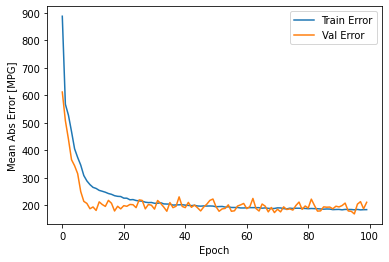

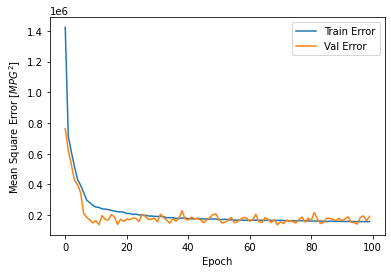

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.legend()
  plt.show()


plot_history(history)

In [ ]:
y_pred = model4.predict(X_test)
y_pred2=y_pred>0
y_test2=y_test>0
sum(y_pred2)

array([9578])

Confusion matrix, without normalization
[[20200   277]
 [  593  9301]]


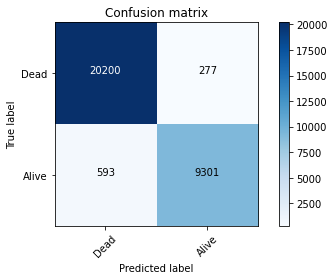

In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
 
plot_confusion_matrix(confusion_matrix(y_test2, y_pred2),['Dead','Alive'])

In [ ]:
import sklearn.metrics
print(f'f1 score: {sklearn.metrics.f1_score(y_test2, y_pred2)*100:.2f}%')
print(f'Accuracy: {sklearn.metrics.accuracy_score(y_test2, y_pred2)*100:.2f}%')

f1 score: 95.53%
Accuracy: 97.14%


In [ ]:
model4.save('model_03252211.h5')



---
## **Interested Data set:**

Light intensity of LED in different temperature, stressing current, performing hour, input voltage.

Temperature: from 20 to 60, every 5 unit

Stressing current: from 40 to 100, every 5 unit

Input voltage: from -5.00 to 5.00, every 0.05 unit

Performing hour: start from 0, every 0.2 unit, untill predicted light intensity become 0.





In [ ]:
m=model4

In [ ]:
from tqdm import trange
r_list=[]
column_list=['temperature','stressing current','performing hour','input voltage','light intensity']
for temperature in trange(293,338,5):
  for stressing_current in range(40,105,5):
    performing_hour = 0
    while performing_hour<=30000:
      li=m.predict(np.array([[ temperature , stressing_current , performing_hour ,0]]))[0][0]
      li-=100
      li=max(0,li)
      if li<0: print(li)
      r_list.append( [temperature,stressing_current,performing_hour,0,li])
      if li<=0: break
      if performing_hour<20:
        performing_hour+=1
      elif performing_hour<50:
        performing_hour+=3
      elif performing_hour<100:
        performing_hour+=5
      elif performing_hour<300:
        performing_hour+=20
      elif performing_hour<800:
        performing_hour+=50
      elif performing_hour<2000:
        performing_hour+=120
      elif performing_hour<10000:
        performing_hour+=200
      else:
        performing_hour+=1000
record=pd.DataFrame(r_list,columns=column_list)

100%|██████████| 9/9 [00:43<00:00,  4.89s/it]


In [ ]:
record['temperature']=record['temperature']-273

In [ ]:
record

,temperature,stressing current,performing hour,input voltage,light intensity
0,20,40,0,0,1975.810303
1,20,40,1,0,2074.696777
2,20,40,2,0,2346.847412
3,20,40,3,0,2398.308838
4,20,40,4,0,2403.764893
...,...,...,...,...,...
1142,60,95,4,0,740.369202
1143,60,95,5,0,549.265503
1144,60,95,6,0,0.000000
1145,60,100,0,0,1198.703369


In [ ]:
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%m%d%H%M")
record.to_csv('/content/LED_output_Li_'+current_time+'.csv')

In [ ]:
df_dropped.to_csv('/content/dropped_input.csv')

# **2. Diode Current Prediction**





---

## **Re-Data Extraction: Dropping weird data**
Tem 25, Current 60, Hr>=15

Tem 60, Current 60, Hr>=11


In [ ]:
dataset.head()

,LED,temperature,stressing current,performing hour,input voltage,reverse saturated current,light intensity
0,A,25,40,0.0,-5.00,-5.270000e-10,2517
1,A,25,40,0.0,-4.95,-5.180000e-10,2517
2,A,25,40,0.0,-4.90,-5.210000e-10,2517
3,A,25,40,0.0,-4.85,-5.220000e-10,2517
4,A,25,40,0.0,-4.80,-5.160000e-10,2517


In [ ]:
df=dataset
from sklearn.utils import shuffle
df=shuffle(df)
df['temperature']=df['temperature']+273
df['reverse saturated current']=df['reverse saturated current']*(10**10)
df

,LED,temperature,stressing current,performing hour,input voltage,reverse saturated current,light intensity
34224,C,298,40,4.0,-2.30,-5.100000e+00,2763
12556,A,333,60,11.0,-0.30,0.000000e+00,0
79105,E,333,60,10.0,0.60,3.630000e-02,0
31518,B,333,80,4.0,3.10,1.707720e+08,0
16221,A,333,100,1.0,2.05,1.120000e+03,0
...,...,...,...,...,...,...,...
20832,B,298,60,10.0,1.45,-3.510000e+00,2544
39017,C,298,80,0.0,-3.85,-4.980000e+00,3282
14421,A,333,80,3.0,2.50,5.510000e+05,215
6381,A,298,80,3.0,2.50,2.990000e+05,403


In [ ]:
X = df.iloc[:,1:5].values
y = df.iloc[:,5].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

optimizer = keras.optimizers.RMSprop(0.001)
#optimizer = keras.optimizers.Nadam()
# Initialising the ANN
model_c = Sequential()

# Adding the input layer and the first hidden layer
model_c.add(Dense(units = 32, activation = 'relu', input_dim = 4, kernel_regularizer=regularizers.l1(0.01)))
model_c.add(Dropout(0.2))
model_c.add(Dense(units = 32, activation = 'relu', kernel_regularizer=regularizers.l1(0.01)))
model_c.add(Dropout(0.2))
model_c.add(Dense(units = 32, activation = 'relu', kernel_regularizer=regularizers.l1(0.01)))
model_c.add(Dropout(0.2))
model_c.add(Dense(units = 32, activation = 'relu', kernel_regularizer=regularizers.l1(0.01)))
model_c.add(Dropout(0.2))

# Adding the output layer
model_c.add(Dense(units = 1, activation = 'relu'))

# Compiling the DNN
model_c.compile(optimizer = optimizer, loss = 'mse', metrics = ['mse','mae'])

# Fitting the DNN to the Training set
history_c = model_c.fit(X_train, y_train, batch_size = 100, epochs = 50, validation_split = 0.2,verbose=1)

Epoch 1/50
534/534 [==============================] - 2s 2ms/step - loss: 118950884325691152.0000 - mse: 118950884325691152.0000 - mae: 138744062.0860 - val_loss: 116146807720902656.0000 - val_mse: 116146807720902656.0000 - val_mae: 142067824.0000
Epoch 2/50
534/534 [==============================] - 1s 2ms/step - loss: 112782049676110848.0000 - mse: 112782047685172736.0000 - mae: 153408187.1850 - val_loss: 100554504478392320.0000 - val_mse: 100554504478392320.0000 - val_mae: 208289792.0000
Epoch 3/50
534/534 [==============================] - 1s 2ms/step - loss: 102330802891321888.0000 - mse: 102330802891321888.0000 - mae: 214672951.4467 - val_loss: 100087598583644160.0000 - val_mse: 100087598583644160.0000 - val_mae: 213807488.0000
Epoch 4/50
534/534 [==============================] - 1s 2ms/step - loss: 101129232934070224.0000 - mse: 101129232934070224.0000 - mae: 215195226.9458 - val_loss: 99727774813519872.0000 - val_mse: 99727774813519872.0000 - val_mae: 214446944.0000
Epoch 5/50

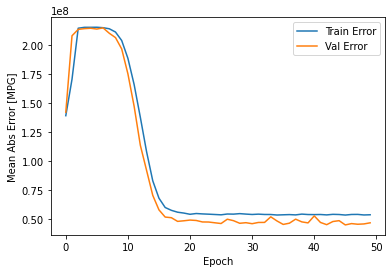

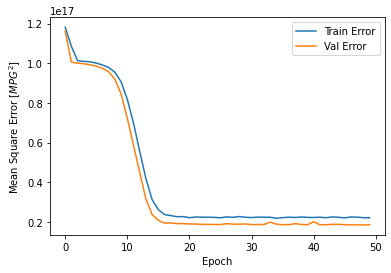

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.legend()
  plt.show()


plot_history(history_c)

In [ ]:
hist = pd.DataFrame(history_c.history)
hist['epoch'] = history_c.epoch
hist.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
45,2.197672e+16,2.197672e+16,53145832.0,1.854655e+16,1.854655e+16,44606056.0,45
46,2.246979e+16,2.246979e+16,53646660.0,1.848422e+16,1.848422e+16,45748824.0,46
47,2.237140e+16,2.237140e+16,53700240.0,1.847027e+16,1.847027e+16,45187304.0,47
48,2.209574e+16,2.209574e+16,53220580.0,1.844887e+16,1.844887e+16,45457412.0,48
49,2.204641e+16,2.204641e+16,53389908.0,1.850534e+16,1.850534e+16,46421352.0,49


In [ ]:
y_pred = model_c.predict(X_test)
pd.DataFrame(y_pred,columns=['pred'])

,pred
0,0.0
1,0.0
2,208726656.0
3,0.0
4,0.0
...,...
16678,0.0
16679,718072832.0
16680,212127760.0
16681,0.0


In [ ]:
result = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test,columns=['true']), pd.DataFrame(y_pred,columns=['pred'])], axis=1)

In [ ]:
result.columns=['tem','stressing current','performing hour','input voltage','true','pred']
result['tem']=result['tem']-273
result['true']=result['true']/(10**10)
result['pred']=result['pred']/(10**10)
result

,tem,stressing current,performing hour,input voltage,true,pred
0,25.0,100.0,4.0,-3.50,-6.970000e-11,0.000000
1,60.0,60.0,4.0,1.05,-4.130000e-10,0.000000
2,25.0,80.0,3.0,2.95,1.130859e-02,0.020873
3,25.0,60.0,4.0,-3.30,-5.040000e-10,0.000000
4,25.0,60.0,17.0,0.50,-1.950000e-10,0.000000
...,...,...,...,...,...,...
16678,25.0,100.0,4.0,-0.10,-4.060000e-11,0.000000
16679,60.0,60.0,4.0,4.05,1.000025e-01,0.071807
16680,60.0,60.0,12.0,3.35,5.159710e-02,0.021213
16681,60.0,100.0,2.0,-2.35,-7.250000e-09,0.000000




---
## **Interested Data set:**

Light intensity of LED in different temperature, stressing current, performing hour, input voltage.

Temperature: from 20 to 60, every 5 unit

Stressing current: from 40 to 100, every 5 unit

Input voltage: from -5.00 to 5.00, every 0.05 unit

Performing hour: start from 0, every 0.2 unit, untill hr>=100.





In [ ]:
from tqdm import trange
r_list=[]
column_list=['temperature','stressing current','performing hour','input voltage','reverse saturated current']
for temperature in trange(293,338,5):
  for stressing_current in range(40,105,5):
    performing_hour = 0
    while performing_hour<=1000:
      for input_voltage in range(-500, 501 ,50):
        input_voltage=input_voltage/100
        li=model_c.predict(np.array([[ temperature , stressing_current , performing_hour ,input_voltage]]))[0][0]
        r_list.append( [temperature,stressing_current,performing_hour,input_voltage,li])
        if performing_hour<100:
          performing_hour+=1
        elif performing_hour<300:
          performing_hour+=3
        elif performing_hour<1000:
          performing_hour+=6
        else:
          performing_hour+=10
record_c=pd.DataFrame(r_list,columns=column_list)

100%|██████████| 9/9 [22:14<00:00, 148.25s/it]


In [ ]:
record_c['temperature']=record_c['temperature']-273
record_c['reverse saturated current']=record_c['reverse saturated current']/(10**10)
record_c

,temperature,stressing current,performing hour,input voltage,reverse saturated current
0,20,40,0,-5.0,0.0
1,20,40,1,-4.5,0.0
2,20,40,2,-4.0,0.0
3,20,40,3,-3.5,0.0
4,20,40,4,-3.0,0.0
...,...,...,...,...,...
35095,60,100,1113,2.5,0.0
35096,60,100,1123,3.0,0.0
35097,60,100,1133,3.5,0.0
35098,60,100,1143,4.0,0.0


In [ ]:
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%m%d%H%M")
record_c.to_csv('/content/LED_output_RSC_'+current_time+'.csv')

In [ ]:
df_dropped.to_csv('/content/dropped_input_RSV.csv')



---
## **Assumption:**
Let f(t) be light intensity of a LED at performing hour ***t***.


f(t) followed a normal distribution with mean μt and variance σ^2t, where f(t) is affected by temperature, stressing current, and input voltage.

Therefore, we can build a predictive model to predict the distribution of f(t) by deep learning